In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge 

from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import random

In [5]:
np.random.seed(13)

In [7]:
train = pd.read_csv('./data/imputed_train.csv')
test = pd.read_csv('./data/imputed_test.csv')
pd.set_option('display.max_columns', len(train.columns)) 

In [43]:
X = train.drop(columns = ['price','latitude', 'longitude', 'id', 'host_response_rate'])
y = train['price']

In [9]:
train.drop(columns = 'Unnamed: 0', inplace = True)
test.drop(columns = 'Unnamed: 0', inplace = True)
train.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,has_availability,availability_30,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,tv,heating,gym,internet,parking,kitchen_supply,bathroom_supply,laundry,entrance,stay,secure,neighbourhood_cleansed_Arden Heights,neighbourhood_cleansed_Arrochar,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Bath Beach,neighbourhood_cleansed_Battery Park City,neighbourhood_cleansed_Bay Ridge,neighbourhood_cleansed_Bay Terrace,neighbourhood_cleansed_Baychester,neighbourhood_cleansed_Bayside,neighbourhood_cleansed_Bayswater,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Belle Harbor,neighbourhood_cleansed_Bellerose,neighbourhood_cleansed_Belmont,neighbourhood_cleansed_Bensonhurst,neighbourhood_cleansed_Bergen Beach,neighbourhood_cleansed_Bloomfield,neighbourhood_cleansed_Boerum Hill,neighbourhood_cleansed_Borough Park,neighbourhood_cleansed_Breezy Point,neighbourhood_cleansed_Briarwood,neighbourhood_cleansed_Brighton Beach,neighbourhood_cleansed_Broad Channel,neighbourhood_cleansed_Bronx Park,neighbourhood_cleansed_Bronxdale,neighbourhood_cleansed_Brooklyn Heights,neighbourhood_cleansed_Brownsville,neighbourhood_cleansed_Bull's Head,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Cambria Heights,neighbourhood_cleansed_Canarsie,neighbourhood_cleansed_Carroll Gardens,neighbourhood_cleansed_Castle Hill,neighbourhood_cleansed_Castleton Corners,neighbourhood_cleansed_Central Park,neighbourhood_cleansed_Chelsea,"neighbourhood_cleansed_Chelsea, Staten Island",neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_City Island,neighbourhood_cleansed_Civic Center,neighbourhood_cleansed_Claremont Village,neighbourhood_cleansed_Clason Point,neighbourhood_cleansed_Clifton,neighbourhood_cleansed_Clinton Hill,neighbourhood_cleansed_Co-op City,neighbourhood_cleansed_Cobble Hill,neighbourhood_cleansed_College Point,neighbourhood_cleansed_Columbia St,neighbourhood_cleansed_Concord,neighbourhood_cleansed_Concourse,neighbourhood_cleansed_Concourse Village,neighbourhood_cleansed_Coney Island,neighbourhood_cleansed_Corona,neighbourhood_cleansed_Country Club,neighbourhood_cleansed_Crotona Park,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_Cypress Hills,neighbourhood_cleansed_DUMBO,neighbourhood_cleansed_Ditmars Steinway,neighbourhood_cleansed_Dongan Hills,neighbourhood_cleansed_Douglaston,neighbourhood_cleansed_Downtown Brooklyn,neighbourhood_cleansed_Dyker Heights,neighbourhood_cleansed_East Elmhurst,neighbourhood_cleansed_East Flatbush,neighbourhood_cleansed_East Harlem,neighbourhood_cleansed_East Morrisania,neighbourhood_cleansed_East New York,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Eastchester,neighbourhood_cleansed_Edenwald,neighbourhood_cleansed_Edgemere,neighbourhood_cleansed_Ellis Island,neighbourhood_cleansed_Elmhurst,neighbourhood_cleansed_Eltingville,neighbourhood_cleansed_Emerson Hill,neighbourhood_cleansed_Far Rockaway,neighbourhood_cleansed_Ferry Point Park,neighbourhood_cleansed_Fieldston,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Flatbush,neighbourhood_cleansed_Flatiron District,neighbourhood_cleansed_Flatlands,neighbourhood_cleansed_Floral Park,neighbourhood_cleansed_Flushing,neighbourhood_cleansed_Flushing Meadows Corona Park,neighbourhood_cleansed_Fordham,neighbourhood_cleansed_Forest Hills,neighbourhood_cleansed_Forest Park,neighbourhood_cleansed_Fort Greene,neighbourhood_cleansed_Fort Hamilton,neighbourhood_cleansed_Fort Wadsworth,neighbourhood_cleansed_Fresh Meadows,neighbourhood_cleansed_Freshkills Park,neigh

In [10]:
train.isnull().sum()
train.dropna(inplace = True)
test.dropna(inplace = True)

In [11]:
X_train = train.drop(columns = ['price','latitude', 'longitude', 'id', 'host_response_rate'])
y_train = train['price']
X_test = test.drop(columns = ['price','latitude', 'longitude', 'id', 'host_response_rate'])
y_test = test['price']

Logarithmic The Price 

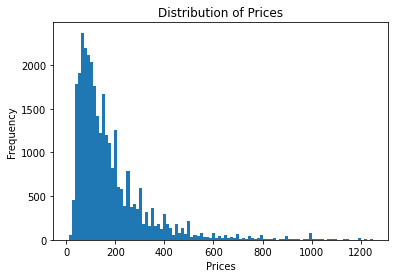

In [13]:
plt.hist(y_train, bins = 100)
plt.title('Distribution of Prices')
plt.xlabel('Prices')
plt.ylabel('Frequency');

In [14]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

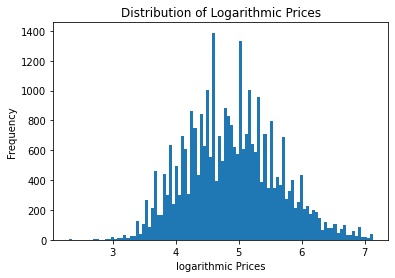

In [15]:
plt.hist(y_train_log, bins = 100)
plt.title('Distribution of Logarithmic Prices')
plt.xlabel('logarithmic Prices')
plt.ylabel('Frequency');

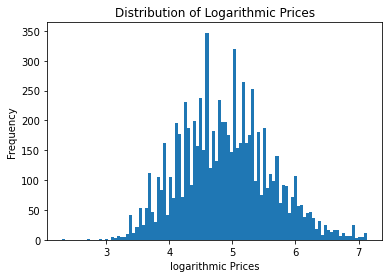

In [16]:
plt.hist(y_test_log, bins = 100)
plt.title('Distribution of Logarithmic Prices')
plt.xlabel('logarithmic Prices')
plt.ylabel('Frequency');

In [66]:
lr = LinearRegression()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)
lr.fit(X_train_ss, y_train_log)

In [68]:
print('LR Train R squared:', lr.score(X_train_ss, y_train_log))
print('LR Test R squared :', lr.score(X_test_ss, y_test_log))

LR Train R squared: 0.7098213178588164
LR Test R squared : -8.06716771318903e+20


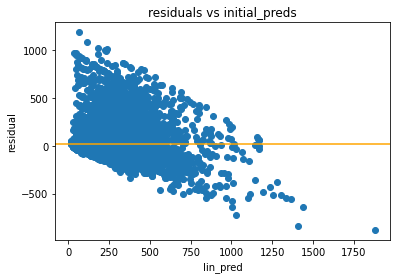

In [72]:
linear_train_preds = lr.predict(X_train_ss)
linear_val_preds = lr.predict(X_test_ss)
residuals = y_train - np.exp(linear_train_preds)
plt.title('residuals vs initial_preds')
plt.xlabel('lin_pred')
plt.ylabel('residual')
plt.scatter(np.exp(linear_train_preds), residuals);
plt.axhline(residuals.mean(), color = 'orange');

In [18]:
lasso_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('model', Lasso())
])
lasso_params = [
    {
        'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
]

lasso_gs = GridSearchCV(lasso_pipe, param_grid = lasso_params,verbose = 0, n_jobs = -1)
lasso_gs.fit(X_train, y_train_log)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid=[{'model__alpha': [0.001, 0.01, 0.1, 1, 10, 100,
                                           1000]}])

In [19]:
blasso_train_preds = lasso_gs.predict(X_train)
lasso_val_preds = lasso_gs.predict(X_test)
actual_values = y_test
print(lasso_gs.best_params_)
print(lasso_gs.best_score_)

{'model__alpha': 0.1}
0.42569323822597954


In [20]:
print('Lasso Train R squared:', lasso_gs.score(X_train, y_train_log))
print('Lasso Test R squared :', lasso_gs.score(X_test, y_test_log))

Lasso Train R squared: 0.4534399805332916
Lasso Test R squared : 0.4504639749671818


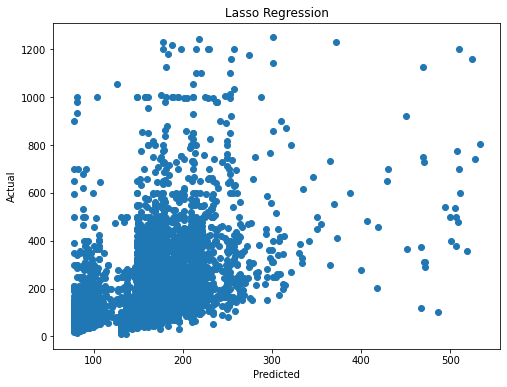

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(lasso_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Lasso Regression');

In [25]:
ridge_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('model', Ridge())
])
ridge_params = [
    {
        'model__alpha': np.logspace(0, 5, 100, 1000)
    }
]

ridge_gs = GridSearchCV(ridge_pipe, param_grid = ridge_params,verbose = 0, n_jobs = -1)
ridge_gs.fit(X_train, y_train_log)

GridSearchCV(estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid=[{'model__alpha': array([1.00000000e+00, 1.12332403e+00, 1.26185688e+00, 1.41747416e+00,
       1.59228279e+00, 1.78864953e+00, 2.00923300e+00, 2.25701972e+00,
       2.53536449e+00, 2.84803587e+00, 3.19926714e+00, 3.59381366e+00,
       4.03701726e+00, 4.53487851e+00, 5.09413801e+...
       6.89261210e+03, 7.74263683e+03, 8.69749003e+03, 9.77009957e+03,
       1.09749877e+04, 1.23284674e+04, 1.38488637e+04, 1.55567614e+04,
       1.74752840e+04, 1.96304065e+04, 2.20513074e+04, 2.47707636e+04,
       2.78255940e+04, 3.12571585e+04, 3.51119173e+04, 3.94420606e+04,
       4.43062146e+04, 4.97702356e+04, 5.59081018e+04, 6.28029144e+04,
       7.05480231e+04, 7.92482898e+04, 8.90215085e+04, 1.00000000e+05])}])

In [26]:
ridge_train_preds = ridge_gs.predict(X_train)
ridge_val_preds = ridge_gs.predict(X_test)
actual_values = y_test
print(ridge_gs.best_params_)
print(ridge_gs.best_score_)

{'model__alpha': 100000.0}
-10829.5465706244


In [27]:
print('Ridge Train R squared:', ridge_gs.score(X_train, y_train_log))
print('Ridge Validation R squared:', ridge_gs.score(X_test, y_test_log))

Ridge Train R squared: 0.5139757560484852
Ridge Validation R squared: 0.510499470271566


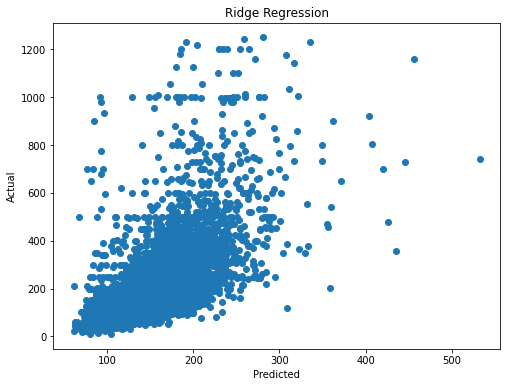

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(np.exp(ridge_val_preds), actual_values)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ridge Regression');

In [29]:
bag_pipe = Pipeline([
    ('bag', BaggingRegressor(random_state = 13))
])

bag_params = {
    'bag__n_estimators': [11,13,15],
    'bag__max_samples': [0.65, 0.75, 0.85],
    'bag__max_features': [0.65, 0.75, 0.85],
}

bag_gs = GridSearchCV(bag_pipe, param_grid = bag_params)

bag_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('bag',
                                        BaggingRegressor(random_state=13))]),
             param_grid={'bag__max_features': [0.65, 0.75, 0.85],
                         'bag__max_samples': [0.65, 0.75, 0.85],
                         'bag__n_estimators': [11, 13, 15]})

In [30]:
bag_train_preds = bag_gs.predict(X_train)
bag_val_preds = bag_gs.predict(X_test)
bag_gs.best_params_

{'bag__max_features': 0.65, 'bag__max_samples': 0.75, 'bag__n_estimators': 15}

In [32]:
print('Bag Train R squared:', bag_gs.score(X_train, y_train))
print('Bag Validation R squared:', bag_gs.score(X_test, y_test))


Bag Train R squared: 0.8924883553732523
Bag Validation R squared: 0.5680899196118525


In [33]:
rf_pipe = Pipeline([
    ('rf', RandomForestRegressor(random_state = 13))
])

rf_params = {
    'rf__n_estimators': [50, 75, 100, 150],
    'rf__max_depth': [5, 7, 9],
    'rf__max_features': ['sqrt', 1],
    'rf__max_samples': [0.65, 0.75, 0.85],
}

rf_gs = GridSearchCV(rf_pipe, param_grid = rf_params)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(random_state=13))]),
             param_grid={'rf__max_depth': [5, 7, 9],
                         'rf__max_features': ['sqrt', 1],
                         'rf__max_samples': [0.65, 0.75, 0.85],
                         'rf__n_estimators': [50, 75, 100, 150]})

In [34]:
rf_train_preds = rf_gs.predict(X_train)
rf_val_preds = rf_gs.predict(X_test)
rf_gs.best_params_

{'rf__max_depth': 9,
 'rf__max_features': 'sqrt',
 'rf__max_samples': 0.85,
 'rf__n_estimators': 150}

In [35]:
print('Random Forest Train R squared:', rf_gs.score(X_train, y_train))
print('Random Fores Validation R squared:', rf_gs.score(X_test, y_test))



Random Forest Train R squared: 0.508203659665186
Random Fores Validation R squared: 0.4560035315154142


Neural Network

In [36]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [75]:

nn = Sequential()
nn.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
nn.add(Dense(256, activation='relu'))
nn.add(Dense(256, activation='relu'))
nn.add(Dense(1, activation='linear'))

# Compiling the model
nn.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_squared_error'])

# Model summary
print(nn.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               40192     
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 139,265
Trainable params: 139,265
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
nn2_history = nn2.fit(X_train,
                  y_train,
                  epochs=100,
                  batch_size=256,
                  validation_split = 0.1)


Epoch 1/100
111/111 [==============================] - 1s 5ms/step - loss: 5045558272.0000 - mean_squared_error: 5045558272.0000 - val_loss: 14558.1211 - val_mean_squared_error: 14558.1211
Epoch 2/100
111/111 [==============================] - 0s 3ms/step - loss: 794307392.0000 - mean_squared_error: 794307392.0000 - val_loss: 14351.7148 - val_mean_squared_error: 14351.7129
Epoch 3/100
111/111 [==============================] - 0s 3ms/step - loss: 57347012.0000 - mean_squared_error: 57347012.0000 - val_loss: 16225.1328 - val_mean_squared_error: 16225.1328
Epoch 4/100
111/111 [==============================] - 0s 4ms/step - loss: 1150049.1250 - mean_squared_error: 1150049.1250 - val_loss: 16789.8047 - val_mean_squared_error: 16789.8047
Epoch 5/100
111/111 [==============================] - 0s 4ms/step - loss: 89209.3828 - mean_squared_error: 89209.3828 - val_loss: 14705.6621 - val_mean_squared_error: 14705.6621
Epoch 6/100
111/111 [==============================] - 0s 3ms/step - loss: 14